<a href="https://colab.research.google.com/github/jioooo20/pengolahan-citra-dan-visi-komputer/blob/main/week6_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **D. PRAKTIKUM FILTER**

1. Buat fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.
2. Berikut merupakan langkah-langkah yang dapat dilakukan:
a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan
pada akun github seperti pada modul sebelumnya

In [ ]:
#imppoootttt
from google.colab import drive
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from PIL import Image as im
drive.mount('/content/drive')

Mounted at /content/drive


Load citra yang akan diproses dan ubah menjadi citra keabuan

In [ ]:
def convolution2d(image, kernel, stride=1, padding=0):
    """
    image  : array 2D input citra (grayscale)
    kernel : array 2D kernel/filter
    stride : langkah pergeseran filter
    padding: jumlah padding 0 di sekeliling citra
    """
    # Pastikan kernel adalah numpy array
    kernel = np.array(kernel)
    image = np.array(image)

    # Ukuran citra & kernel
    i_h, i_w = image.shape
    k_h, k_w = kernel.shape

    # Tambahkan padding
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image

    # Ukuran output
    o_h = ((i_h + 2*padding - k_h) // stride) + 1
    o_w = ((i_w + 2*padding - k_w) // stride) + 1

    output = np.zeros((o_h, o_w))

    # Lakukan konvolusi
    for y in range(o_h):
        for x in range(o_w):
            # Ambil region dari citra sesuai ukuran kernel
            region = image_padded[
                y*stride : y*stride + k_h,
                x*stride : x*stride + k_w
            ]
            # Perkalian elemen dan jumlahkan
            output[y, x] = np.sum(region * kernel)

    return output

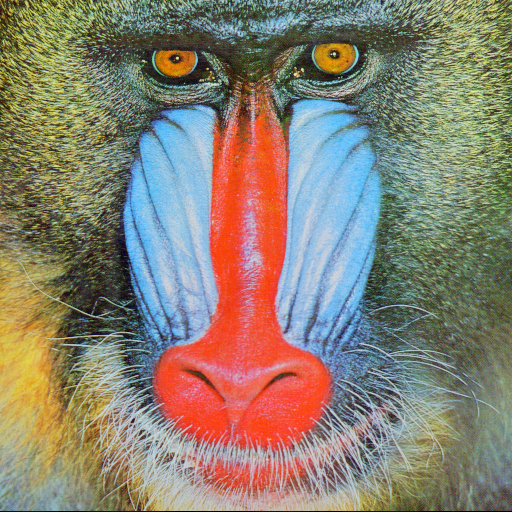

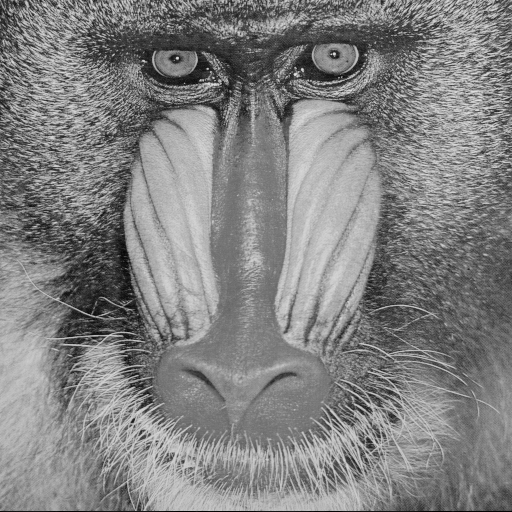

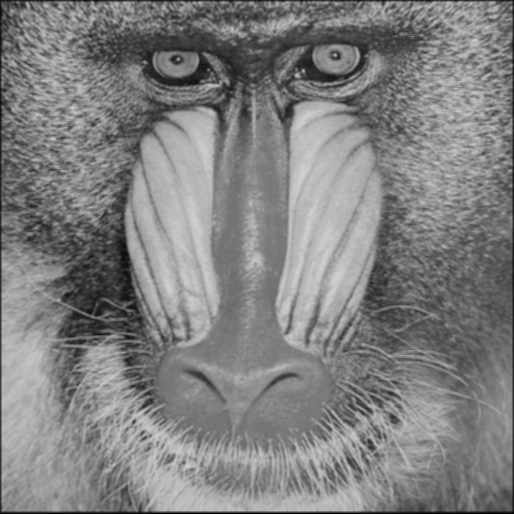

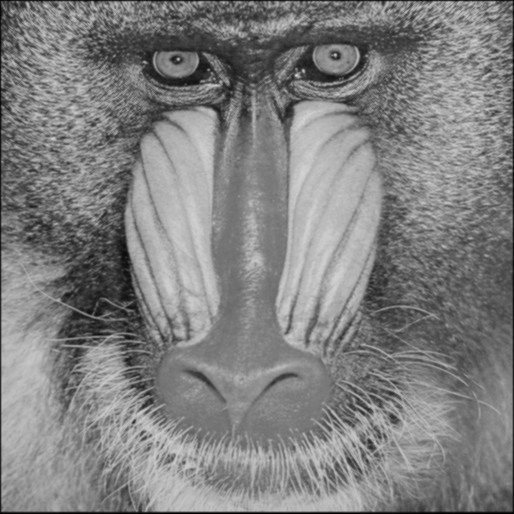

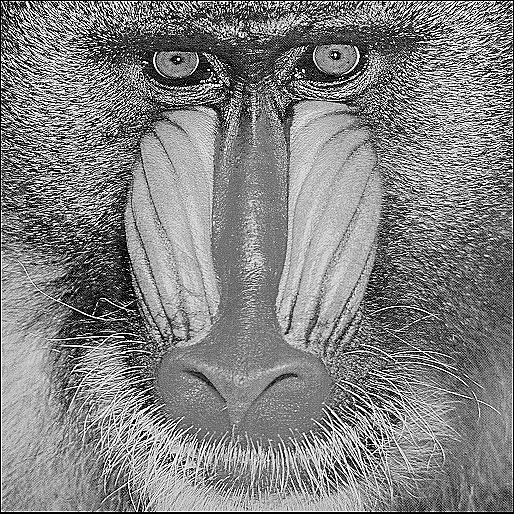

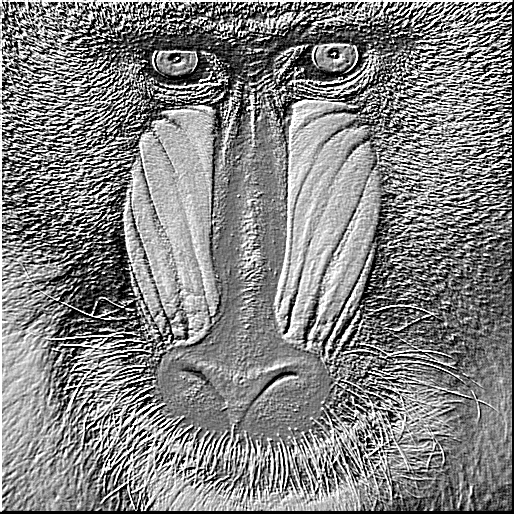

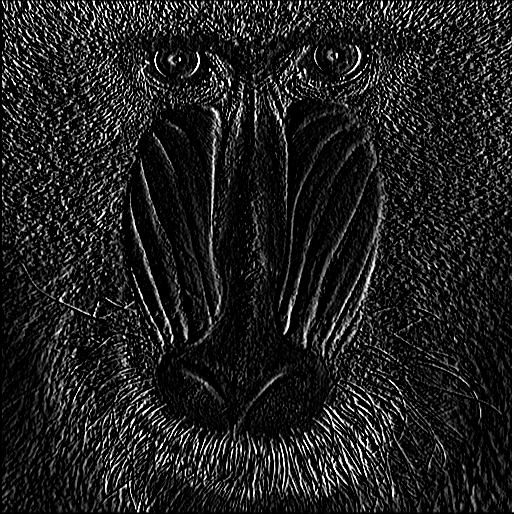

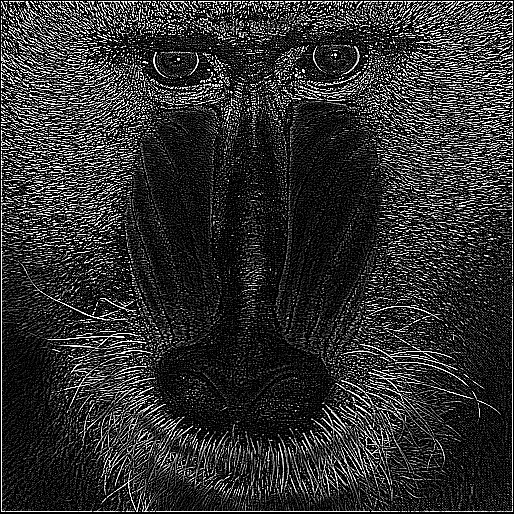

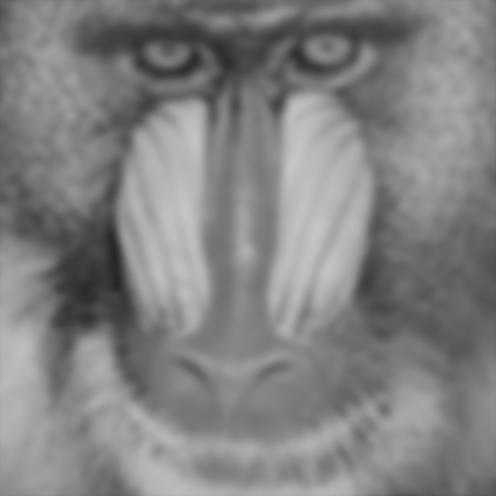

In [ ]:
img = cv.imread('/content/drive/MyDrive/citrapcvk/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#kernel yg digunakan
kernel_avg = (1/9)*(np.array([[1,1,1],
                           [1,1,1],
                           [1,1,1]]))

kernel_low = (1/12)*(np.array([[1,1,1],
                           [1,4,1],
                           [1,1,1]]))

kernel_high = np.array([[-1,0,1],
                        [-1,0,3],
                        [-3,0,1]])

kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

kernel_emboss = np.array([[-2,-1,0],
                           [-1,1,1],
                           [0,1,2]])

kernel_left_sobel_edge = np.array([[1,0,-1],
                                   [2,0,-2],
                                   [1,0,-1]])

kernel_canny_edge = np.array([[-1,-1,-1],
                              [-1,8,-1],
                              [-1,-1,-1]])
kernel_size = 21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @gaussian_kernel.transpose()



#fungsi konvo
avg = convolution2d(img_gray, kernel_avg, 1, 2)
low = convolution2d(img_gray, kernel_low, 1, 2)
sharpen = convolution2d(img_gray, kernel_sharpen, 1, 2)
embos = convolution2d(img_gray, kernel_emboss, 1, 2)
leftsobeledge = convolution2d(img_gray, kernel_left_sobel_edge, 1, 2)
cannyedge = convolution2d(img_gray, kernel_canny_edge, 1, 2)
blur = convolution2d(img_gray, gauss_kernel, 1, 2)


#tampilkan
cv2_imshow(img)
cv2_imshow(img_gray)
cv2_imshow(avg)
cv2_imshow(low)
cv2_imshow(sharpen)
cv2_imshow(embos)
cv2_imshow(leftsobeledge)
cv2_imshow(cannyedge)
cv2_imshow(blur)

# **E. FILTER LIBRARY DAN FILTER MODERN**

Pada beberapa percobaan berikut ini kita akan melihat beberapa filter menggunakan library, filter
modern yang digunakan pada CNN, filter modern dengan kombinasi beberapa filter tradisional (tanpa
Deep Learning).



Percobaan 1:
Pada percobaan 1 ini, kita akan membuat Filter Gaussian, Sharpen, dan Canny menggunakan library
filter2d dari OpenCV. Filter ini akan kita terapkan pada Image RGB. Pada bagian awal kode terdapat
fungsi show_side_by_side yang digunakan untuk menampilkan gambar secara berdampingan.


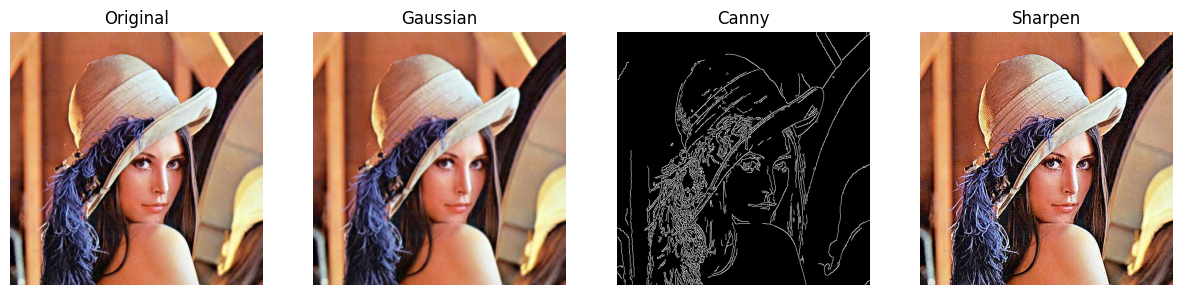

In [ ]:
# fungsi tampil berdampingan
def show_side_by_side(imgs, tits, figsize=(15,5)):
  plt.figure(figsize=figsize)
  for i, (img, tit) in enumerate(zip(imgs, tits)):
    if len(img.shape) == 2: #grayscale
      plt.subplot(1, len(imgs), i+1)
      plt.imshow(img, cmap='gray')
    else:
      plt.subplot(1, len(imgs), i+1)
      plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(tit)
    plt.axis("off")
  plt.show()

img = cv.imread('/content/drive/MyDrive/citrapcvk/lena.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(img, (7,7), 1)
edges = cv.Canny(img_gray, 100, 200)
sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
sharpen = cv.filter2D(img, -1, sharpen_kernel)

show_side_by_side([img, blur, edges, sharpen], ["Original", "Gaussian", "Canny", "Sharpen"])

Percobaan 2:
Pada percobaan 2 berikut ini akan dilakukan filtering modern dari Library OpenCV. Dua filter yang akan
digunakan adalah Bilateral Filtering dan Guided Filter. **Bilateral filtering** adalah sebuah metode
penyaringan non-linear yang banyak digunakan untuk menghaluskan citra sekaligus tetap
mempertahankan ketajaman tepi. Berbeda dengan Gaussian blur biasa yang hanya memperhitungkan
jarak spasial antar piksel, bilateral filter juga mempertimbangkan perbedaan intensitas warna. Dengan
cara ini, piksel-piksel yang letaknya dekat dan memiliki warna mirip dengan pusat jendela akan
mendapat bobot lebih besar dalam perhitungan, sedangkan piksel dengan perbedaan warna kontras
(misalnya di sisi tepi) akan tereduksi pengaruhnya. Akibatnya, citra menjadi lebih halus pada area
datar, namun garis batas dan detail penting tetap terjaga. Meskipun menghasilkan kualitas yang baik,
bilateral filter tergolong lambat karena perhitungan bobot yang cukup kompleks. Dalam praktiknya,
filter ini banyak dipakai untuk keperluan seperti perbaikan kualitas foto, pengurangan noise, maupun
sebagai dasar dari efek beauty filter untuk melembutkan tekstur kulit tanpa mengaburkan kontur
wajah.


**Guided filtering** merupakan teknik yang lebih modern dan efisien. Filter ini didasarkan pada asumsi
bahwa, dalam sebuah jendela lokal, hasil penyaringan dapat direpresentasikan sebagai fungsi linear
dari citra pemandu (guide image). Artinya, setiap piksel keluaran dihitung dengan mempertimbangkan
hubungan linier antara nilai piksel di citra masukan dengan nilai piksel pada citra pemandu. Jika citra
masukan dan citra pemandu sama, guided filter akan berperan mirip bilateral filter namun dengan
perhitungan yang jauh lebih cepat dan hasil yang lebih halus. Keunggulan lainnya, guided filter bisa
menggunakan citra yang berbeda sebagai pemandu sehingga mampu mengarahkan proses filtering
sesuai kebutuhan. Berkat sifat ini, guided filter sering dipakai dalam berbagai aplikasi lanjutan seperti
HDR tone mapping, peningkatan detail, image matting, feathering, serta pemurnian depth map pada
sistem stereo vision. Secara umum, guided filter menawarkan keseimbangan antara preservasi tepi
yang baik, kualitas visual yang halus, dan efisiensi komputasi, sehingga dianggap sebagai
penyempurnaan dari pendekatan bilateral filtering.


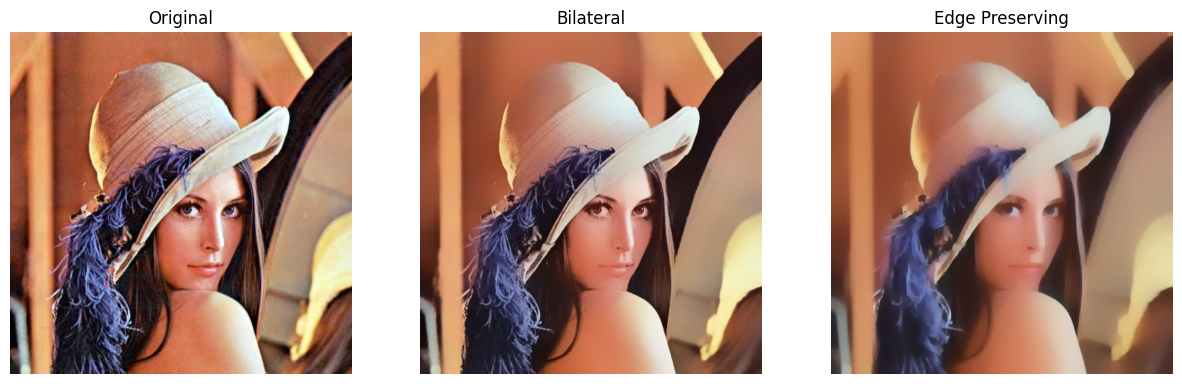

In [ ]:
#filter modern dari opencv
#bliateral filtering(edge-preserving)
bilateral = cv.bilateralFilter(img, 50, 100, 100)

#edge preserving filter (alt guided filter)
edge_preserve = cv.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9)

show_side_by_side([img, bilateral, edge_preserve], ["Original", "Bilateral", "Edge Preserving"])


Percobaan 3:
Percobaan kali ini akan mencoba melihat proses Filtering pada CNN (bagian Feature Map), lakukan
running code beberapa kali dan perhatikan hasil outputnya. Apa yang dapat kamu simpulkan dari hasil
keluaran tersebut.


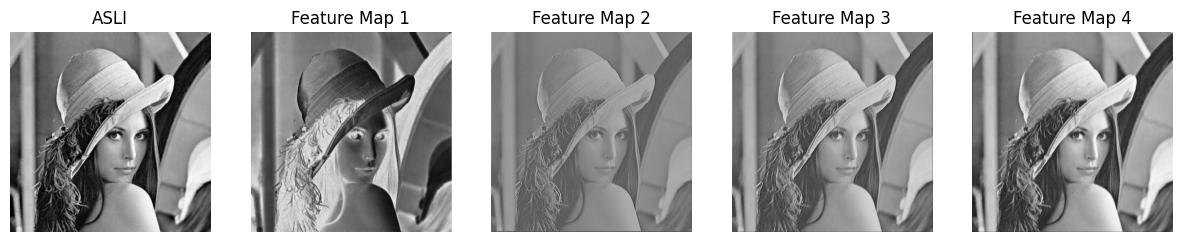

In [ ]:
#filter feature map yang digunakan pada CNN, lakukan running code bagian ini bbrp kali dan perhatikan hasilnya
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=3, stride=1, padding=1)

  def forward(self, x):
    x = self.conv1(x)
    return x

model = SimpleCNN()

#ubah gambar ke tensor
img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0)/255.0

#hasil cnn
with torch.no_grad():
  features = model(img_tensor)

#visualisasi feature maps
feature_maps = [features[0,i].numpy() for i in range(features.shape[1])]
show_side_by_side([img_gray] + feature_maps, ["ASLI"] + [f"Feature Map {i+1}" for i in range(len(feature_maps))])

#hasil berubah tiap kali dijalankan

Percobaan 4:
Percobaan kali ini akan melakukan efek Beauty dan Vintage yang biasanya digunakan pada Aplikasi
popular saat ini. Filter yang digunakan merupakan kombinasi dari filter tradisional. Perlu diketahui
untuk filter aplikasi popular bisa jadi tidak menggunakan metode yang sama. Pada Aplikasi popular
bisa jadi menggunakan model GenAI dengan data Training untuk memberikan hasil yang lebih akurat.

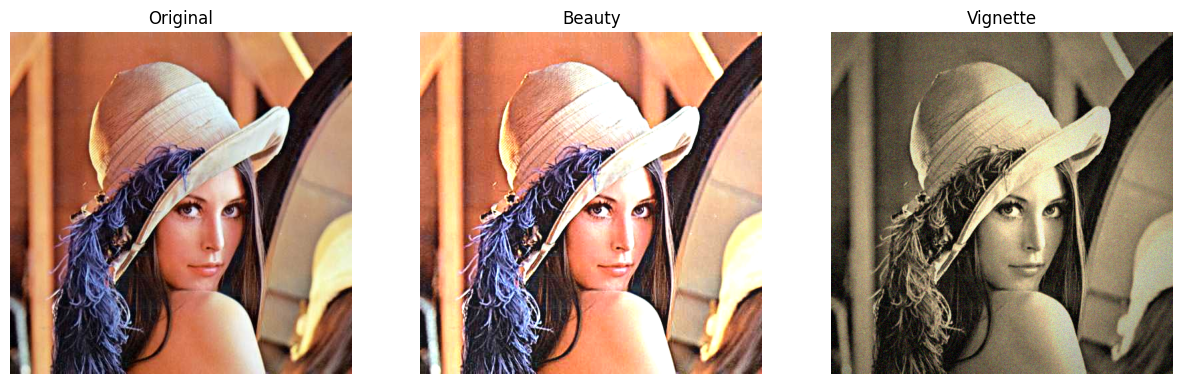

In [ ]:
#beauty filter
#step 1 smoothing kulit dengan bilateral filter
smooth = cv.bilateralFilter(img, 15, 75, 75)

#step 2 unsharp masking (pertajam bibir mata)
gaussian = cv.GaussianBlur(img, (0,0), 3)
sharpened = cv.addWeighted(img, 1.5, gaussian, -0.5, 0)

#step 3 brightness dan contrast
alpha = 1.2
beta = 15
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)

#old/vintage filter
#step 1 sepia tone
sepia_kernel = np.array([[0.272, 0.534, 0.131],
                  [0.349, 0.686, 0.168],
                  [0.393, 0.769, 0.189]])
sepia = (cv.transform(img, sepia_kernel))
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

#step2 vignette
rows,cols = img.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols*0.6)
kernel_y = cv.getGaussianKernel(cols, rows*0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy(sepia)
for i in range(3):
  vignette[:,:,i] = vignette[:,:,i] * mask

#step3 noise/grain
noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
old_img = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)

show_side_by_side([img, beauty, old_img], ["Original","Beauty", "Vignette"])


Percobaan 5:
Percobaan 5 akan menunjukkan pada anda filter anime / cartoon menggunakan kombinasi filter
tradisional.

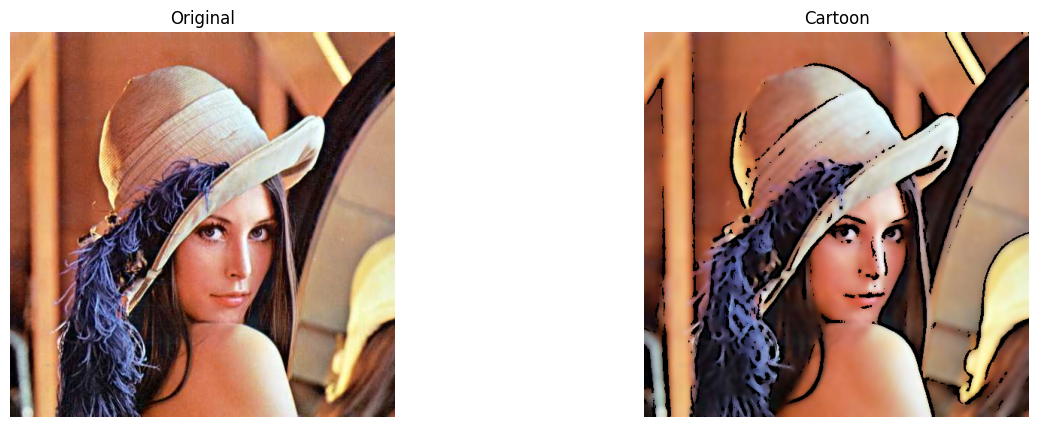

In [ ]:
#filter anime / cartoon
#step1 edge detection(pakai medan blur dulu agar gambar menjadi lebih halus)
gray_blur = cv.medianBlur(img_gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 9,9)

#step 2 bilateral filtering untuk smoothing warna
color = cv.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

#step 3 gabunga
cartoon = cv.bitwise_and(color, color, mask=edges)

show_side_by_side([img, cartoon], ["Original", "Cartoon"])


Percobaan 6:
Pada Percobaan 6 akan ditunjukkan contoh Filter Malam.

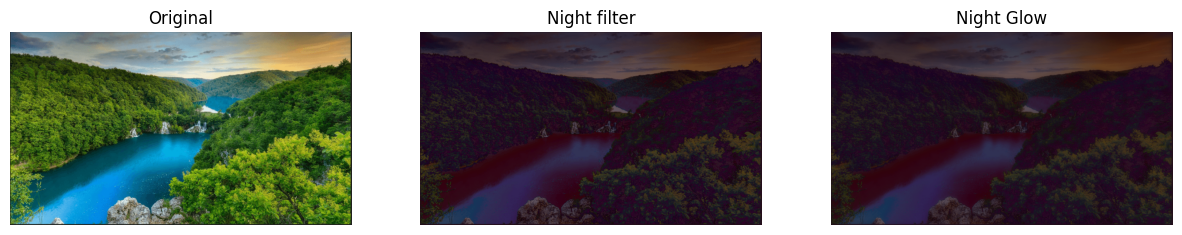

In [ ]:
#night filter
img = cv.imread('/content/drive/MyDrive/citrapcvk/jungle.png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#step 1 gelapkan (contrsat turun, brightness negatif)
night = cv.convertScaleAbs(img, alpha=0.6, beta=-40)

# step 2 tambah bias biru
blue_tint = np.full_like(night, (50, 0, 100)) #BGR
night = cv.addWeighted(night, 0.8, blue_tint, 0.2, 0)

#step 3 efek glow di area terang dengan filter2d (blur kernel)
kernel = np.ones((15,15), np.float32) / 255.0
glow = cv.filter2D(night, -1, kernel)

night_glow = cv.addWeighted(night, 0.7, glow, 0.3, 0)

show_side_by_side([img, night, night_glow], ["Original","Night filter", "Night Glow"])



Percobaan 7
Percobaan 7 menunjukkan Filter Pagi dan Pagi ditambahkan efek kabut.

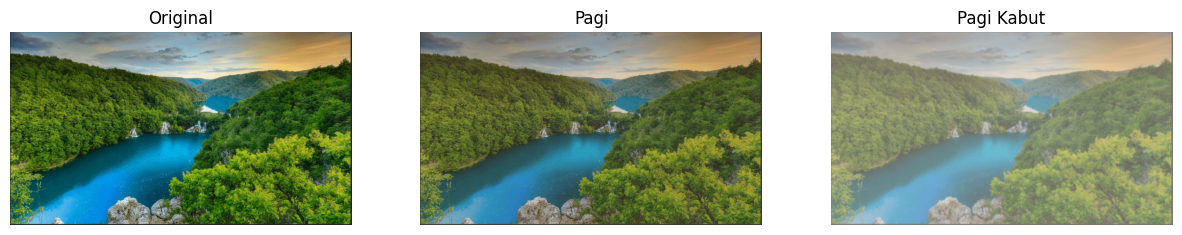

In [ ]:
#filter suasana pagi dan kabut
#step 1 kurangi kontras dan kecerahan
a = 0.9
b = 20
soft = cv.convertScaleAbs(img, alpha=a, beta=b)

#step2 tambahkan warm tone
warm_tint = np.full_like(soft, (40,70,120)) #BGR
pagi = cv.addWeighted(soft, 0.8, warm_tint, 0.2, 0)

#step 3 tambahkan haze (kabut tipis dengan filter2D)
kernel = cv.getGaussianKernel(3,3)
kernel = kernel @ kernel.T #jadikan2D kernel
kabut = cv.filter2D(pagi, -1, kernel)

#tambah layer putih untuk kabut lebih nyata
white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted(kabut, 0.7, white_layer, 0.3, 00)

show_side_by_side([img, pagi, kabut], ["Original", "Pagi", "Pagi Kabut"])

